### 

#### 数据加载

In [4]:
import csv
import jieba

# 用户评论数据集
ds_comments = []

# 1. Read the CSV file
with open('./comments.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        vote = int(row['votes'])
        if vote in [0,1,4,5]:
            words = jieba.lcut(row['content'])   
            ds_comments.append((words, 0 if vote > 3 else 1))  # 0 for positive, 1 for negative

len(ds_comments)


4479

#### 分析评论长度，考虑截取过长，过短评论

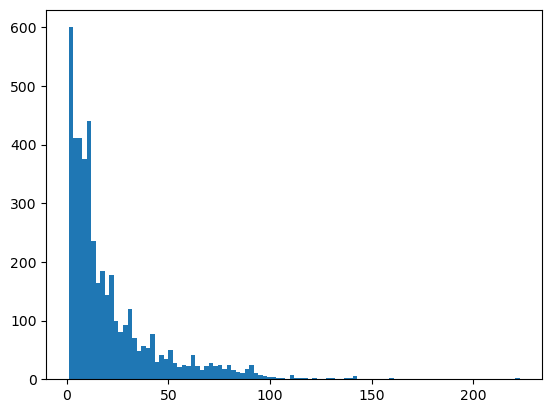

In [5]:
import matplotlib.pyplot as plt

comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

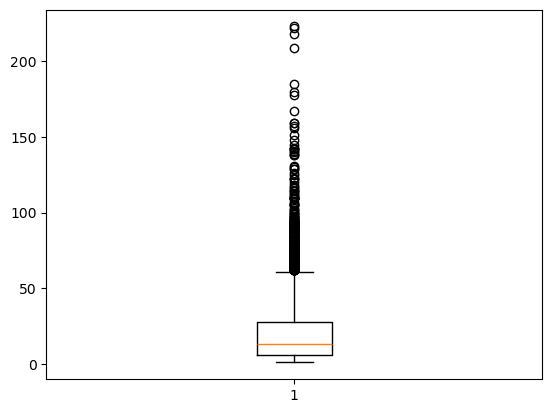

In [6]:
plt.boxplot(comments_len)
plt.show

In [7]:
# 评论词汇长度在10～150之间
ds_comments = [c for c in ds_comments if len(c[0]) in range(10, 150)]

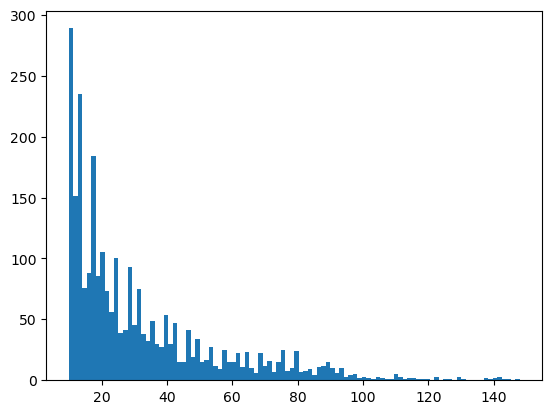

In [8]:
comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

In [10]:
import pickle

with open('./comments.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)